# Projekt zaliczeniowy
### Agnieszka Pawłowska

Niniejszy projekt służy do przekształcania plików z wynikami pomiarów w rozszerzeniu .fet, w którym znajduje się wiele dodatkowych informacji (plik wejściowy pokazany poniżej), do pliku .dat zawierającego jedynie wartości napięcia oraz zmierzonego prądu.  

In [44]:
name = 'P3HT_P4VP_PMMA'
i = 0
plik_wejściowy = []

with open(name+'.fet', 'r') as f:       
        for line in f:
            plik_wejściowy.append(line)
plik_wejściowy

['<Chart Size="914, 632">\n',
 '  <Series>\n',
 '    <Series Name="series1" Legend="Legend1" XValueType="Double" YValueType="Double" ChartType="Point" ChartArea="ChartArea1" Color="Pink" BorderWidth="2">\n',
 '      <Points>\n',
 '        <DataPoint YValues="-3.401674E-07" />\n',
 '        <DataPoint XValue="-5" YValues="-0.0007273284" />\n',
 '        <DataPoint XValue="-10" YValues="-0.001471684" />\n',
 '        <DataPoint XValue="-15" YValues="-0.002251776" />\n',
 '        <DataPoint XValue="-20" YValues="-0.003029471" />\n',
 '        <DataPoint XValue="-25" YValues="-0.003798929" />\n',
 '        <DataPoint XValue="-30" YValues="-0.004584035" />\n',
 '        <DataPoint XValue="-35" YValues="-0.005378512" />\n',
 '        <DataPoint XValue="-40" YValues="-0.006205439" />\n',
 '        <DataPoint XValue="-45" YValues="-0.007022124" />\n',
 '        <DataPoint XValue="-50" YValues="-0.00787531" />\n',
 '        <DataPoint XValue="-45" YValues="-0.006998735" />\n',
 '        <DataP

W celu wyodrębnienia z pliku wejściowego tylko wartości X (U[V]) oraz Y (I[A]) wykorzystano kilka list, poniżej znajdują się najbardziej istotne z punktu widzenia projektu listy:
- new_list - lista na plik wejściowy z pominięciem nagłówka
- new_lst - lista w w której każda linia pliku wejściowego traktowana jest jak lista z elementami
- data - lista w której pojawią się jedynie elementy zawierające dane 
- del1 - lista w której pojawią się wyrazy do usunięcia - BEZ POWTÓRZEŃ - w delete znajdują się wszystkie wyrazy do usunięcia
- indexes - lista na indeksy z X = 0 - w pliku wejściowym punkty X=0 nie zawierają informacji o wartości X
- meas - lista na indeksy kolejnych serii pomiarów - informacja o tym, w którym miejscu należy pociąć listę
- Xdata oraz Ydata zawierają wszytskie wartości X oraz YValues zawarte w pliku 

W projekcie wykorzystano biblioteki matplotlib - do wyrysowywania wykresów - oraz pandas - do stworzenia DataFrame'ów, z których następnie wyrysowywane są wykresy oraz zapisywane dane w postaci plików z rozszerzeniem .dat.

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

Data for measurement number 1:

     U1 [V]        I1 [A]
0       0.0 -3.401674e-07
1      -5.0 -7.273284e-04
2     -10.0 -1.471684e-03
3     -15.0 -2.251776e-03
4     -20.0 -3.029471e-03
5     -25.0 -3.798929e-03
6     -30.0 -4.584035e-03
7     -35.0 -5.378512e-03
8     -40.0 -6.205439e-03
9     -45.0 -7.022124e-03
10    -50.0 -7.875310e-03
11    -45.0 -6.998735e-03
12    -40.0 -6.156070e-03
13    -35.0 -5.347449e-03
14    -30.0 -4.552559e-03
15    -25.0 -3.785602e-03
16    -20.0 -3.026016e-03
17    -15.0 -2.270100e-03
18    -10.0 -1.517633e-03
19     -5.0 -7.603641e-04
20      0.0 -3.510004e-07
21      5.0  7.891340e-04
22     10.0  1.604477e-03
23     15.0  2.440716e-03
24     20.0  3.294889e-03
25     25.0  4.161707e-03
26     30.0  5.039163e-03
27     35.0  5.933641e-03
28     40.0  6.858048e-03
29     45.0  7.822520e-03
30     50.0  8.823752e-03
31     45.0  7.899969e-03
32     40.0  6.980729e-03
33     35.0  6.073109e-03
34     30.0  5.178064e-03
35     25.0  4.290838e-03
36    

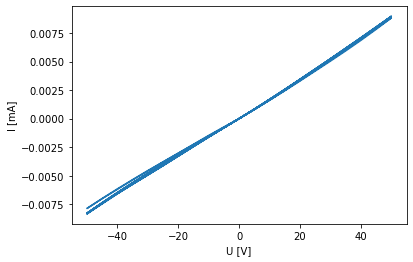

Data for measurement number 2:

     U2 [V]        I2 [A]
0       0.0 -1.283442e-06
1      -5.0 -1.793686e-03
2     -10.0 -3.631263e-03
3     -15.0 -5.512117e-03
4     -20.0 -7.440285e-03
5     -25.0 -9.405347e-03
6     -30.0 -1.139466e-02
7     -35.0 -1.345960e-02
8     -40.0 -1.558451e-02
9     -45.0 -1.777562e-02
10    -50.0 -2.005574e-02
11    -45.0 -1.792859e-02
12    -40.0 -1.581230e-02
13    -35.0 -1.373183e-02
14    -30.0 -1.168015e-02
15    -25.0 -9.658876e-03
16    -20.0 -7.666926e-03
17    -15.0 -5.700588e-03
18    -10.0 -3.763791e-03
19     -5.0 -1.856830e-03
20      0.0 -8.157179e-07
21      5.0  1.806863e-03
22     10.0  3.651442e-03
23     15.0  5.569084e-03
24     20.0  7.559737e-03
25     25.0  9.599201e-03
26     30.0  1.167944e-02
27     35.0  1.390606e-02
28     40.0  1.620019e-02
29     45.0  1.854252e-02
30     50.0  2.094545e-02
31     45.0  1.871993e-02
32     40.0  1.650630e-02
33     35.0  1.432769e-02
34     30.0  1.218092e-02
35     25.0  1.007022e-02
36    

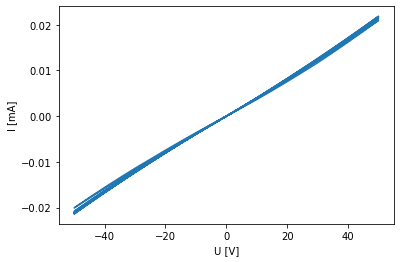

Data for measurement number 3:

     U3 [V]        I3 [A]
0       0.0 -1.114507e-07
1      -5.0 -2.072540e-04
2     -10.0 -3.957946e-04
3     -15.0 -5.848474e-04
4     -20.0 -7.695646e-04
5     -25.0 -9.755574e-04
6     -30.0 -1.186681e-03
7     -35.0 -1.409484e-03
8     -40.0 -1.648780e-03
9     -45.0 -1.896936e-03
10    -50.0 -2.152906e-03
11    -45.0 -1.923230e-03
12    -40.0 -1.694870e-03
13    -35.0 -1.471017e-03
14    -30.0 -1.251275e-03
15    -25.0 -1.036766e-03
16    -20.0 -8.264066e-04
17    -15.0 -6.202613e-04
18    -10.0 -4.164265e-04
19     -5.0 -2.115017e-04
20      0.0 -8.627456e-08
21      5.0  2.169331e-04
22     10.0  4.345926e-04
23     15.0  6.523379e-04
24     20.0  8.710150e-04
25     25.0  1.091412e-03
26     30.0  1.314592e-03
27     35.0  1.542697e-03
28     40.0  1.776460e-03
29     45.0  2.017333e-03
30     50.0  2.264949e-03
31     45.0  2.025876e-03
32     40.0  1.789615e-03
33     35.0  1.557433e-03
34     30.0  1.328920e-03
35     25.0  1.103215e-03
36    

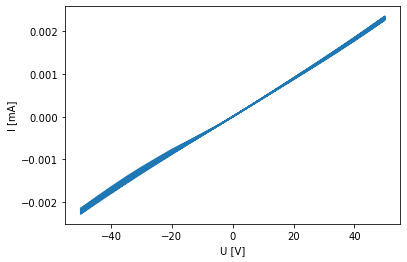

Data for measurement number 4:

   U4 [V]    I4 [A]
0     0.0 -0.001224
1    -5.0 -3.158653
2   -10.0 -6.216339
3   -15.0 -8.969168
4   -20.0 -0.001097
5   -25.0 -0.001389
6   -30.0 -0.001712
7   -35.0 -0.002051
Maximum : U4 [V]   -20.000000
I4 [A]    -0.001097
Name: 4, dtype: float32
Minimum : U4 [V]   -15.000000
I4 [A]    -8.969168
Name: 3, dtype: float32


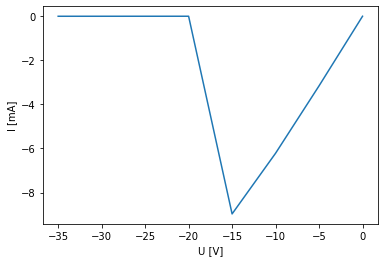

Data for measurement number 5:

     U5 [V]        I5 [A]
0       0.0 -2.635308e-07
1      -5.0 -1.394367e-03
2     -10.0 -2.864953e-03
3     -15.0 -4.362163e-03
4     -20.0 -5.877476e-03
5     -25.0 -7.414563e-03
6     -30.0 -8.964657e-03
7     -35.0 -1.054828e-02
8     -40.0 -1.217883e-02
9     -45.0 -1.387808e-02
10    -50.0 -1.564437e-02
11    -45.0 -1.402189e-02
12    -40.0 -1.239606e-02
13    -35.0 -1.078393e-02
14    -30.0 -9.188697e-03
15    -25.0 -7.608414e-03
16    -20.0 -6.043727e-03
17    -15.0 -4.497050e-03
18    -10.0 -2.971549e-03
19     -5.0 -1.468109e-03
20      0.0 -5.278371e-07
21      5.0  1.410274e-03
22     10.0  2.850906e-03
23     15.0  4.362639e-03
24     20.0  5.901203e-03
25     25.0  7.459495e-03
26     30.0  9.020089e-03
27     35.0  1.059003e-02
28     40.0  1.218485e-02
29     45.0  1.381514e-02
30     50.0  1.546841e-02
31     45.0  1.381141e-02
32     40.0  1.218419e-02
33     35.0  1.060533e-02
34     30.0  9.043403e-03
35     25.0  7.490380e-03
36    

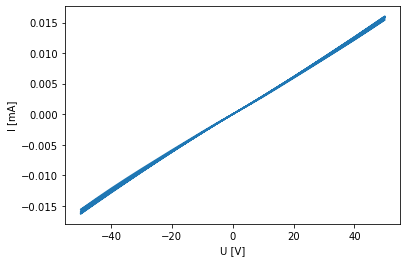

In [48]:
# name = 'ref'
name = 'P3HT_P4VP_PMMA'
i = 0
indexes = [] #lista na indeksy z X = 0
meas = [] #lista na indeksy kolejnych pomiarów - w pliku przykładowym znajduje się 5 serii, stąd też indeksy ich początku
new_list = []
new_lst = []
data = []
delete = []

with open(name+'.fet', 'r') as f:       
        for line in f:
            i=i+1
            if i >= 2:
                new_list.append(line) #tworzę nową listę z pominięciem nagłówka danych 
                
for i in new_list:
        new_lst.append(i.split()) #tworzę nową listę w której każda linia traktowana jest jak lista z elementami

        
#########################################################################################################################
#usuwam niepotrzebne dane
for i in new_lst: #znajduję elementy, które nie są danymi
#     print(i)
    if len(i)==1:
        delete.append(i)
        continue
        
del1 = [] #tworzę listę w której pojawią się wyrazy do usunięcia - BEZ POWTÓRZEŃ - w delete z powtórzeniami
[del1.append(x) for x in delete if x not in del1]

data = []
[data.append(x) for x in new_lst if x not in del1] #usuwam wszystko poza danymi

#########################################################################################################################
#kolejnym krokiem po usunięciu niechcianych elementów jest dodanie brakujących wartości XValue = 0 (w pliku je pominięto)
for i in data:
    if len(i)>1:
#         print(i[1][0])
        if i[1][0] != 'X':
            indexes.append(data.index(i)) #tworzę listę indeksów elementów w których brakuje X = 0     

for i in indexes:
#     print(i)
    data[i].insert(1,'XValues="0"') #dodaję X=0 tam gdzie brakuje danych

#########################################################################################################################
#szukam indeksów w których znajdują się indeksy nowych serii pomiarowych - potrzebne przy dzieleniu danych 68-70
for i in new_lst:
    if len(i)>4:
        meas.append(data.index(i))
meas.append(len(data))
#########################################################################################################################
#"tnę" dane na kawałki, usuwam niepotrzebny tekst
data = data[:-4] 
data3 = []
data2 = [data[i][x] for x in range(1,3)for i in range(len(data))] #wycinam z danych tylko wartości X i Y
for i in data2:
#     print(i)
    nr = i.replace('Values="','').replace('Y','').replace('Value="','').replace('X','').replace('"','') #usuwam tekst
    data3.append(nr) #appenduję same wartości do nowej listy
#data3 ma postać listy z danymi dla X, a następnie dla Y, stąd tnę je na 2 -> końcowe listy z danymi X i Y
lendata = len(data3)/2
Xdata = data3[0:int(lendata)]
Ydata = data3[int(lendata):-1]
# [Ydata.append(float(x)) for x in data3[int(lendata):-1]]
list_number = []
# [[] for i in range(len(meas))] #tworzę puste listy na kolejne serie pomiarowe

#
for i in range(len(meas)-1):
        list_number.append(Xdata[meas[i]+1:meas[i+1]])
        list_number.append(Ydata[meas[i]+1:meas[i+1]])
#końcowa lista o strukturze [[X1],[Y1],[X2],[Y2],...] - krok, który możnaby pominąć i korzystać z samych X i Ydata, jednak 
#jest to dla mnie łatwiejszy sposób

# list_number

#tworzę data frame z danymi
sdat = ""
max_min = []
for i in range(0,len(list_number),2):
#     print(list_number[i:i+2])
    print('\033[1m' +'Data for measurement number ' + str(int(i/2)+1)+':\n'+ '\033[0m')
    df1 = pd.DataFrame(list_number[i:i+2])
    df1 = df1.transpose()
    df1.columns=['U'+str(int(i/2)+1)+' [V]','I'+str(int(i/2)+1)+' [A]']
    df1['U'+str(int(i/2)+1)+' [V]'] = pd.to_numeric(df1['U'+str(int(i/2)+1)+' [V]'], downcast="float")
    df1['I'+str(int(i/2)+1)+' [A]'] = pd.to_numeric(df1['I'+str(int(i/2)+1)+' [A]'], downcast="float")
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    #szukam max i min wartości
    maxx= df1['I'+str(int(i/2)+1)+' [A]'].idxmax()
    minx = df1['I'+str(int(i/2)+1)+' [A]'].idxmin()
    max_min.append(df1.loc[maxx])#zapisuję je osobno dla porównania
    max_min.append(df1.loc[minx])
    print(df1)
    print('\033[1m' +'Maximum :'+'\033[0m', df1.loc[maxx])
    print('\033[1m' +'Minimum :'+'\033[0m',  df1.loc[minx])
    sdat += str(df1) + '\n'
    df1.to_csv(str(name)+str(int(i/2))+'.txt', sep='\t')
    save_data = open(name+"_dane.txt","a")
    fig = plt.figure()
    plt.plot(df1['U'+str(int(i/2)+1)+' [V]'], df1['I'+str(int(i/2)+1)+' [A]']) 
    plt.xlabel('U [V]')
    plt.ylabel('I [mA]')
    plt.show()

# print('\033[1m' +'Data for all the measurements:\n'+ '\033[0m')
# print(sdat)
df2 = pd.DataFrame(max_min)
# print(max_min)
# save_data = open(name+"_dane.txt","a")
# save_data.write(str(sdat))
# save_data.close()
# df2.transpose() #w kolumnach indeksy max i min wartości, jako wiersze U oraz I

Dla porównania w linijkach 108-109 znajdują się polecenia wypisania wszystkich danych.

Dodatkowo, w 110 oraz 115 zawarto dane dotyczące max i min wartości dla każdej serii.

Wyniki pomiarów każdej serii zapisywane są w pętli, w 111-114 dodano polecenia zapisania wszystkich danych.

Dla pokazania tego, że program jest uniwersalny i można przy jego użyciu przekształcać inne pliki zamieszczono dodatkowy plik z wynikami pomiarów urządzenia memrystywnego.